In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import cmocean.cm as cmo

In [52]:
from cycler import cycler
my_cycler = (cycler(color=['#94c8d8','#FE9A84','#296540','#E63F39','#C3AAD1',
              '#D5AC5A','#F4B6C3','#B4BCCA','#DBD468','#B1D3E1','#8b1821']))

fh = 15
plt.rcParams['figure.figsize'] = (9,5)
plt.rcParams['axes.prop_cycle'] = my_cycler
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 9#12
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['axes.labelsize'] = fh
plt.rcParams['xtick.labelsize'] = fh
plt.rcParams['ytick.labelsize'] = fh
plt.rcParams['axes.titlesize'] = fh
plt.rcParams['figure.titlesize'] = fh

# verification

In [66]:
def get_ts_mean(var):
    path_base = f"/global/homes/z/zhangtao/cfs_m4402/PR_DNS_base_ray/DNS/climate/out-entrainment3dd_case1/PDF"
    path_pdf = f"{path_base}-{var}"
    
    files = os.listdir(path_pdf)
    dataset_mean = np.zeros(len(files))
    dataset_std = np.zeros(len(files))
    time_step = np.zeros(len(files))

    for i,f in enumerate(sorted(files)):
        time_step[i] = float(f.split("-")[1])
        data = pd.read_csv(f"{path_pdf}/{f}",header=None,sep='\s+')
        data.columns = ['value','pdf']
        bin_size = data.iloc[1,0] - data.iloc[0,0]
        data['pdf'] = data['pdf'] * bin_size
        data_mean = np.sum(data['value'] * data['pdf'])

        dataset_mean[i] = data_mean
        dataset_std[i] = np.sum((data['value'] - data_mean)**2 * data['pdf']) ** 0.5
          
    return time_step, dataset_mean,dataset_std

In [93]:
def get_tke():
    var = 'xvel'
    path_base = f"/global/homes/z/zhangtao/cfs_m4402/PR_DNS_base_ray/DNS/climate/out-entrainment3dd_case1/PDF"
    path_pdf = f"{path_base}-{var}"
    files = os.listdir(path_pdf)
    tke_std = np.zeros(len(files))
    
    
    for i,f in enumerate(sorted(files)):
        time_step[i] = float(f.split("-")[1])
        data = pd.read_csv(f"{path_pdf}/{f}",header=None,sep='\s+')
        data.columns = ['value','pdf']
        bin_size = data.iloc[1,0] - data.iloc[0,0]
        data['pdf'] = data['pdf'] * bin_size
        xvel = data['value']*data['pdf'].values
        
        data = pd.read_csv(f"{path_base}-yvel/yvel-{time_step[i]:.2f}",header=None,sep='\s+')
        data.columns = ['value','pdf']
        bin_size = data.iloc[1,0] - data.iloc[0,0]
        data['pdf'] = data['pdf'] * bin_size
        yvel = data['value']*data['pdf'].values
        
        data = pd.read_csv(f"{path_base}-zvel/zvel-{time_step[i]:.2f}",header=None,sep='\s+')
        data.columns = ['value','pdf']
        bin_size = data.iloc[1,0] - data.iloc[0,0]
        data['pdf'] = data['pdf'] * bin_size
        zvel = data['value']*data['pdf'].values
        
        tke = (xvel ** 2 + yvel ** 2 + zvel **2) * 0.5
        tke_mean = np.mean(tke)
        tke_std[i] = np.sum((tke-tke_mean)**2) ** 0.5
        
    return tke_std
        
        
tke_std = get_tke()


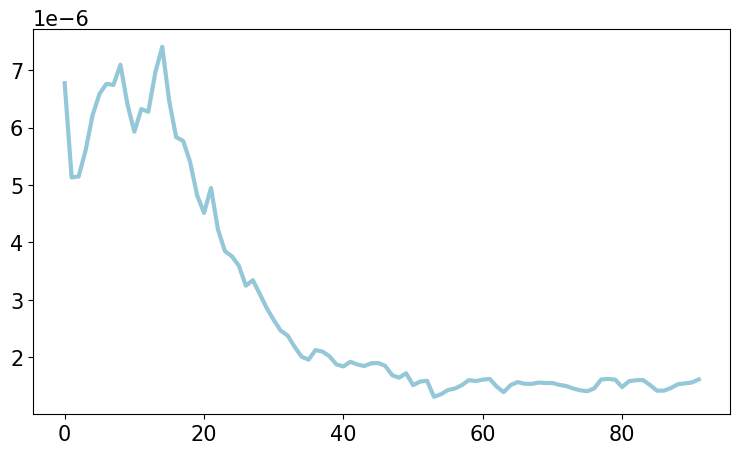

In [94]:
plt.plot(tke_std)

In [70]:
var_list = ['temperature','vapor','supersat']
unit_list = ['K','g/kg','%']

dataset_mean = {}
dataset_std = {}

for i,var in enumerate(var_list):
    time_step, mean,std = get_ts_mean(var)
    if var == 'supersat':
        mean = mean * 100
        std = std * 100
        
    dataset_mean[var] = mean
    dataset_std[var] = std
    

## plot iteration 

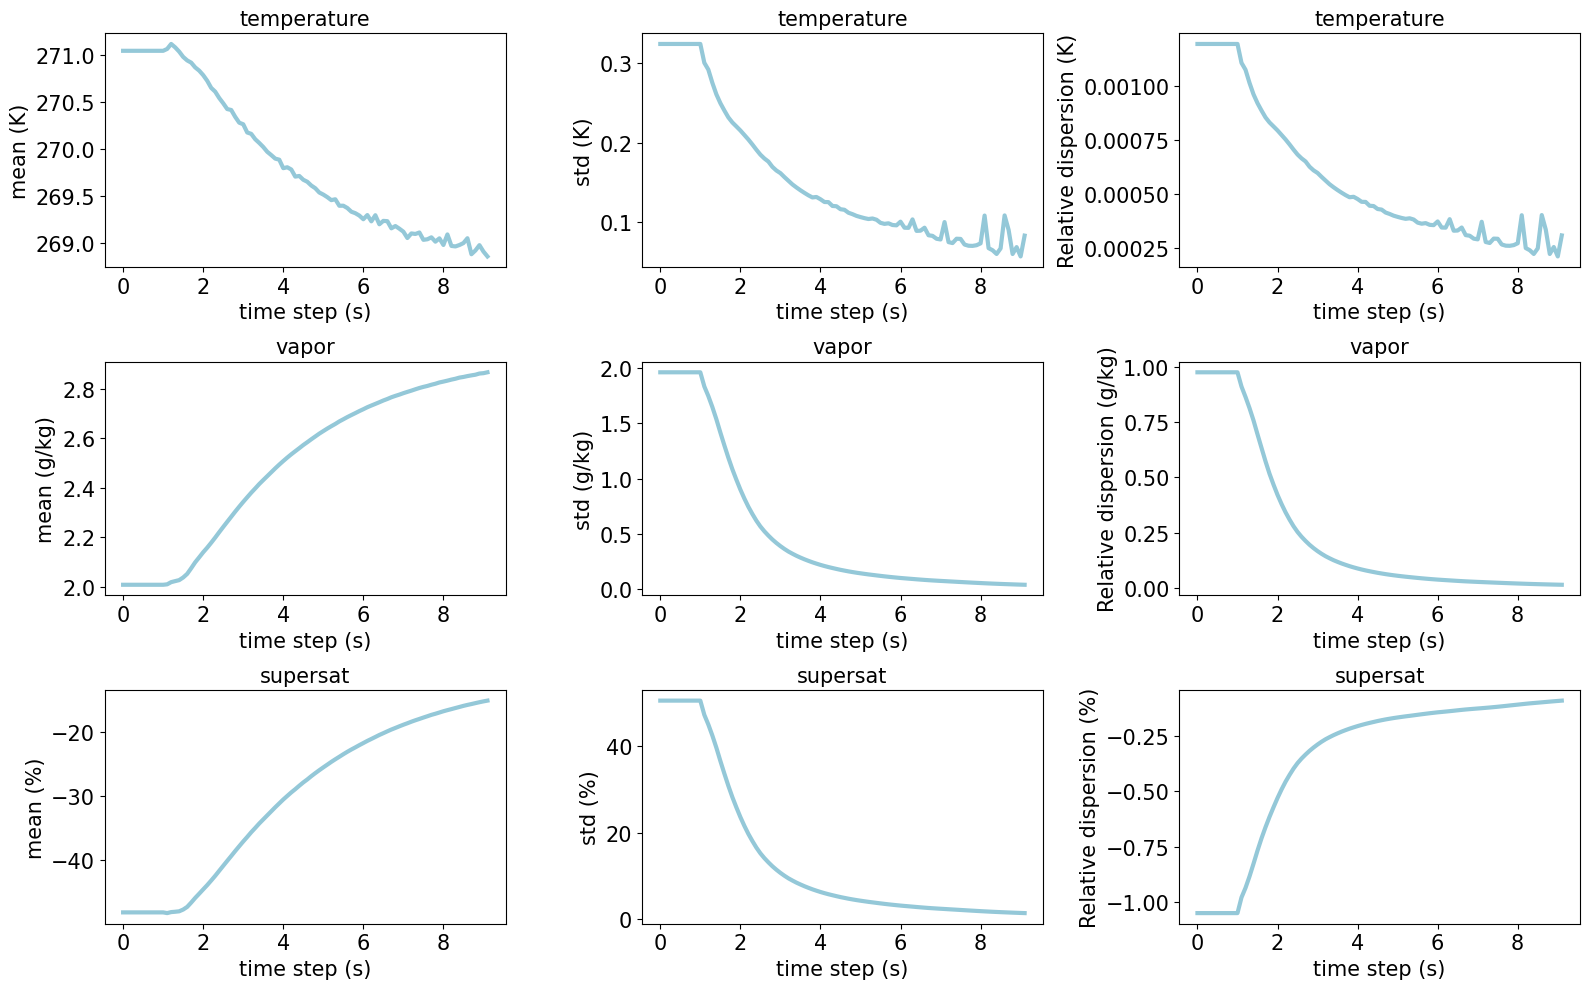

In [81]:
fig, ax = plt.subplots(3,3,figsize=(16,10))

for i,var in enumerate(var_list):
    ax[i][0].plot(time_step,dataset_mean[var])
    ax[i][0].set_title(var)
    ax[i][0].set_xlabel('time step (s)')
    ax[i][0].set_ylabel(f'mean ({unit_list[i]})')
    
for i,var in enumerate(var_list):
    ax[i][1].plot(time_step,dataset_std[var])
    ax[i][1].set_title(var)
    ax[i][1].set_xlabel('time step (s)')
    ax[i][1].set_ylabel(f'std ({unit_list[i]})')
    
    
for i,var in enumerate(var_list):
    ax[i][2].plot(time_step,dataset_std[var]/dataset_mean[var])
    ax[i][2].set_title(var)
    ax[i][2].set_xlabel('time step (s)')
    ax[i][2].set_ylabel(f'Relative dispersion ({unit_list[i]})')

plt.tight_layout()

# pr-dns simulation

In [120]:
base_path = f'/global/homes/z/zhangtao/cfs_m4402/PR_DNS_base_ray/DNS/climate/'
#base_path = f'/pscratch/sd/z/zhangtao/PR_DNS_base_ray/'
#case_name = f'out-entrainment2dm_using_3d'
case_name = f'out-entrainment2dm_d_0.512_g_128_init2'
#case_name = f'out-entrainment2dm_using_3d'
data_path = f'{base_path}/{case_name}/python_data/'

In [122]:
var = 'xvel'
data = np.load(f'{data_path}/pr_dns_{var}.npy')
print(data.shape)

var = 'yvel'
data1 = np.load(f'{data_path}/pr_dns_{var}.npy')
print(data.shape)

data = (data**2 + data1**2) ** 0.5
data_mean = np.mean(data,axis=(1,2))
print(data_mean.shape)
#np.save(f'{data_path}/pr_dns_vel.npy',data)

(6290, 128, 128)
(6290, 128, 128)
(6290,)


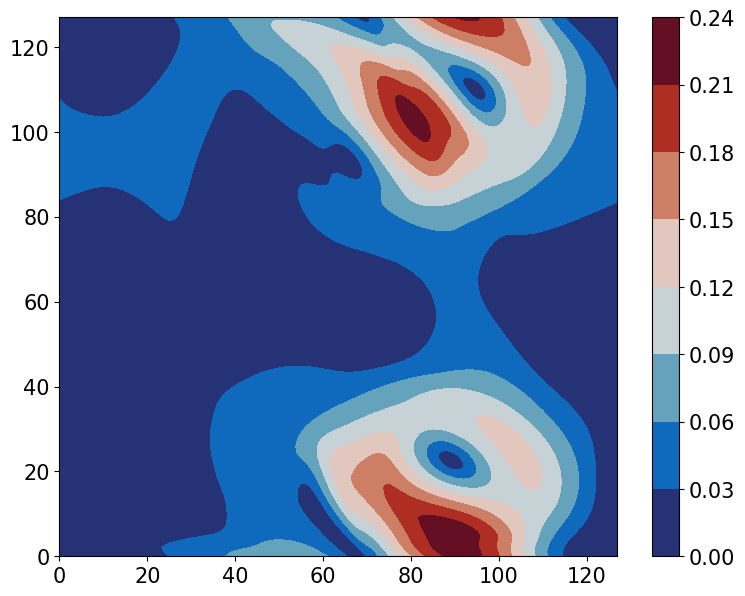

In [70]:
res = data.shape[1]
xx = np.arange(res)
cr = np.arange(0,0.301,0.01)

fig,axes = plt.subplots(1,1,figsize=(9,7))
#a=axes.contourf(xx,xx,data[490,...],cr,extend='both',cmap=cmo.balance)
a=axes.contourf(xx,xx,data[300,...],cmap=cmo.balance)

plt.colorbar(a,ax=axes)

In [74]:
data_path='/pscratch/sd/z/zhangtao/FNO_PR_DNS/tests/FNO_xvel_2048.npz'
data = np.load(data_path)
preds = data['preds']
trues = data['trues']

print(preds.shape)
print(trues.shape)

(200, 1, 2048, 2048)
(200, 1, 2048, 2048)


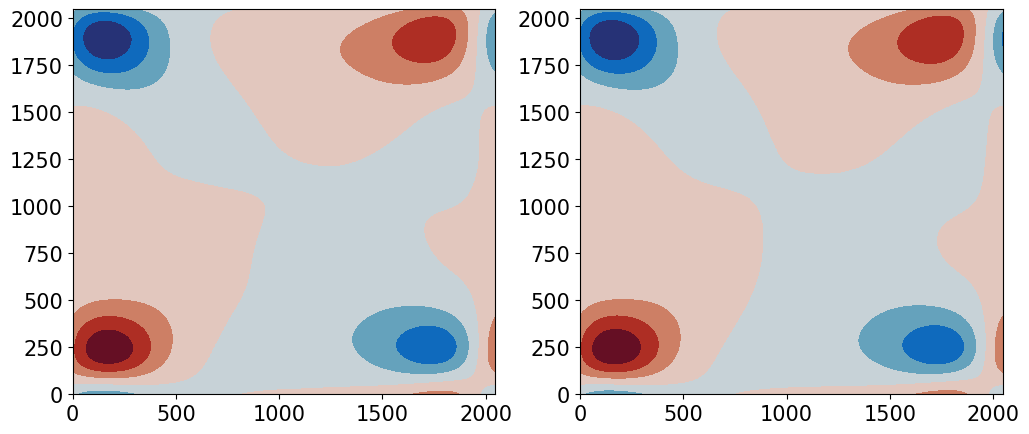

In [81]:
res = 2048
xx = np.arange(res)

fig,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].contourf(xx,xx,preds[190,0,...],cmap=cmo.balance)
ax[1].contourf(xx,xx,trues[190,0,...],cmap=cmo.balance)

In [3]:
data_path='/pscratch/sd/z/zhangtao/FNO_PR_DNS/tests/FNO_vel_1024.npz'
data = np.load(data_path)
preds = data['preds']
trues = data['trues']

print(preds.shape)
print(trues.shape)

(200, 1, 1024, 1024)
(200, 1, 1024, 1024)


Text(0.5, 1.0, 'True velocity (m/s)')

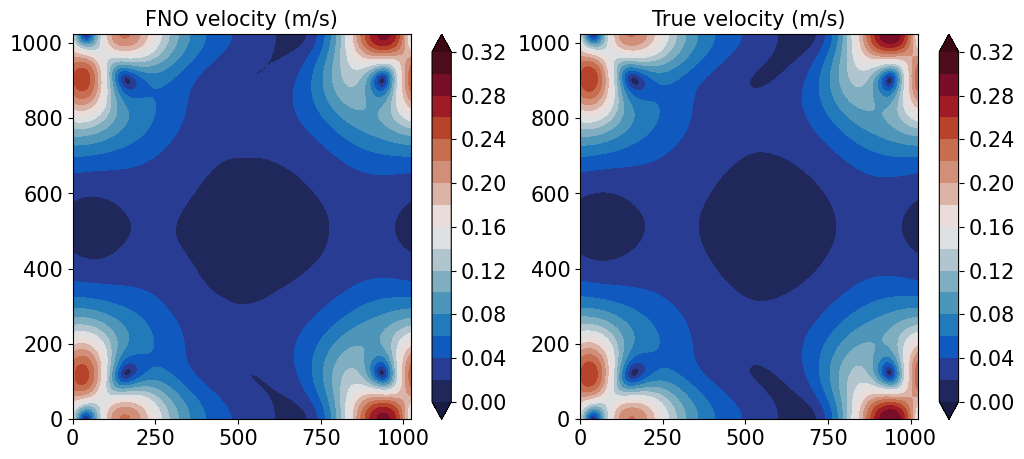

In [8]:
res = 1024
xx = np.arange(res)
cr = np.arange(0,0.321,0.02)

fig,ax = plt.subplots(1,2,figsize=(12,5))
a1=ax[0].contourf(xx,xx,preds[1,0,...],cr,extend='both',cmap=cmo.balance)
a2=ax[1].contourf(xx,xx,trues[1,0,...],cr,extend='both',cmap=cmo.balance)

fig.colorbar(a1,ax=ax[0])
fig.colorbar(a2,ax=ax[1])

ax[0].set_title('FNO velocity (m/s)')
ax[1].set_title('True velocity (m/s)')

## spectrum

In [167]:
data_path = '/pscratch/sd/z/zhangtao/FNO_PR_DNS/tests/FNO_vel_1024.npz'
data = np.load(data_path)
preds = data['preds']
trues = data['trues']
print(preds.shape)

(200, 1, 1024, 1024)


In [169]:
data_path = '/pscratch/sd/z/zhangtao/FNO_PR_DNS/tests/FNO_vel_128.npy'
data = np.load(data_path)
preds = data[0,...]
trues = data[1,...]

In [170]:
preds_mean = np.mean(preds,(1,2,3))
trues_mean = np.mean(trues,(1,2,3))

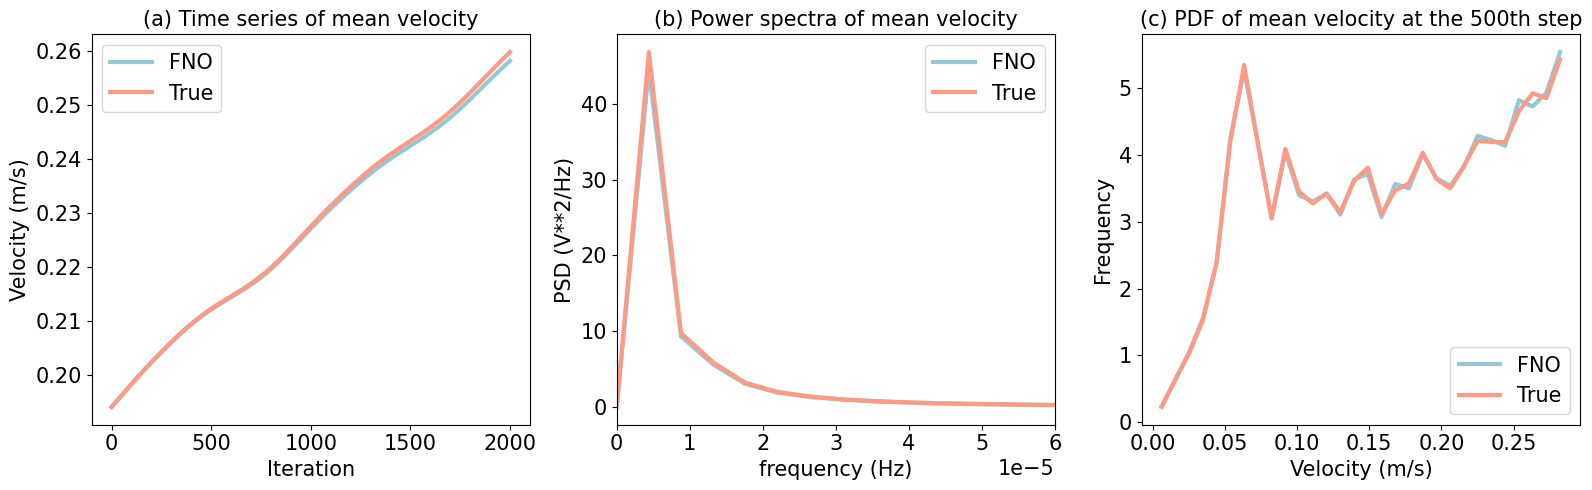

In [181]:
fs = 0.0012
fs = 0.0088

fig,ax = plt.subplots(1,3,figsize=(16,5))
(f_pred, S_pred) = scipy.signal.periodogram(preds_mean, fs , scaling='density')
(f_true, S_true) = scipy.signal.periodogram(trues_mean, fs , scaling='density')

hist_pred,_ = np.histogram(preds[500,0,:,:],bins=bin_edges,density=True)
hist_true,_ = np.histogram(trues[500,0,:,:],bins=bin_edges,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

ax[0].plot(preds_mean,label='FNO')
ax[0].plot(trues_mean,label='True')
ax[0].legend()
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Velocity (m/s)')
ax[0].set_title('(a) Time series of mean velocity')

ax[1].plot(f_pred, S_pred,label='FNO')
ax[1].plot(f_true, S_true,label='True')
ax[1].legend()
ax[1].set_xlabel('frequency (Hz)')
ax[1].set_ylabel('PSD (V**2/Hz)')
ax[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1].set_title('(b) Power spectra of mean velocity')
ax[1].set_xlim([0,0.06e-3])

ax[2].plot(bin_centers,hist_pred,label='FNO')
ax[2].plot(bin_centers,hist_true,label='True')
ax[2].legend()
ax[2].set_xlabel('Velocity (m/s)')
ax[2].set_ylabel('Frequency')
ax[2].set_title('(c) PDF of mean velocity at the 500th step')

plt.tight_layout()
plt.savefig('figs/ps_pdf.pdf')

## pdf

In [159]:
hist_pred,_ = np.histogram(preds[i,0,:,:],bins=bin_edges,density=True)
hist_true,_ = np.histogram(trues[i,0,:,:],bins=bin_edges,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
#print(bin_centers)

In [ ]:
fig,ax

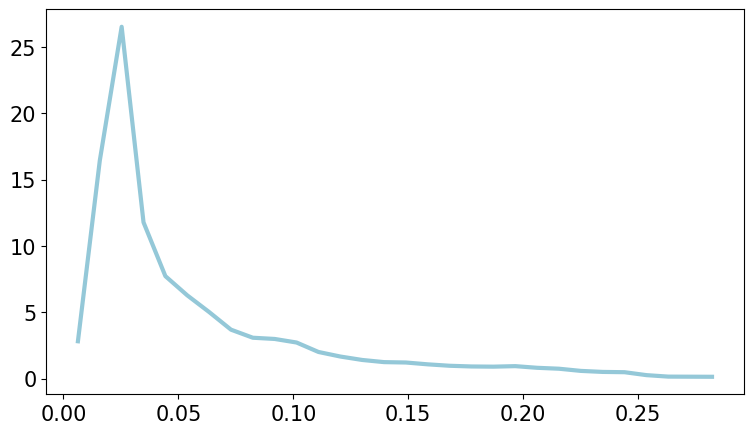

In [153]:
plt.plot(bin_centers,hist)

Text(0.5, 1.0, 'Power Spectrum')

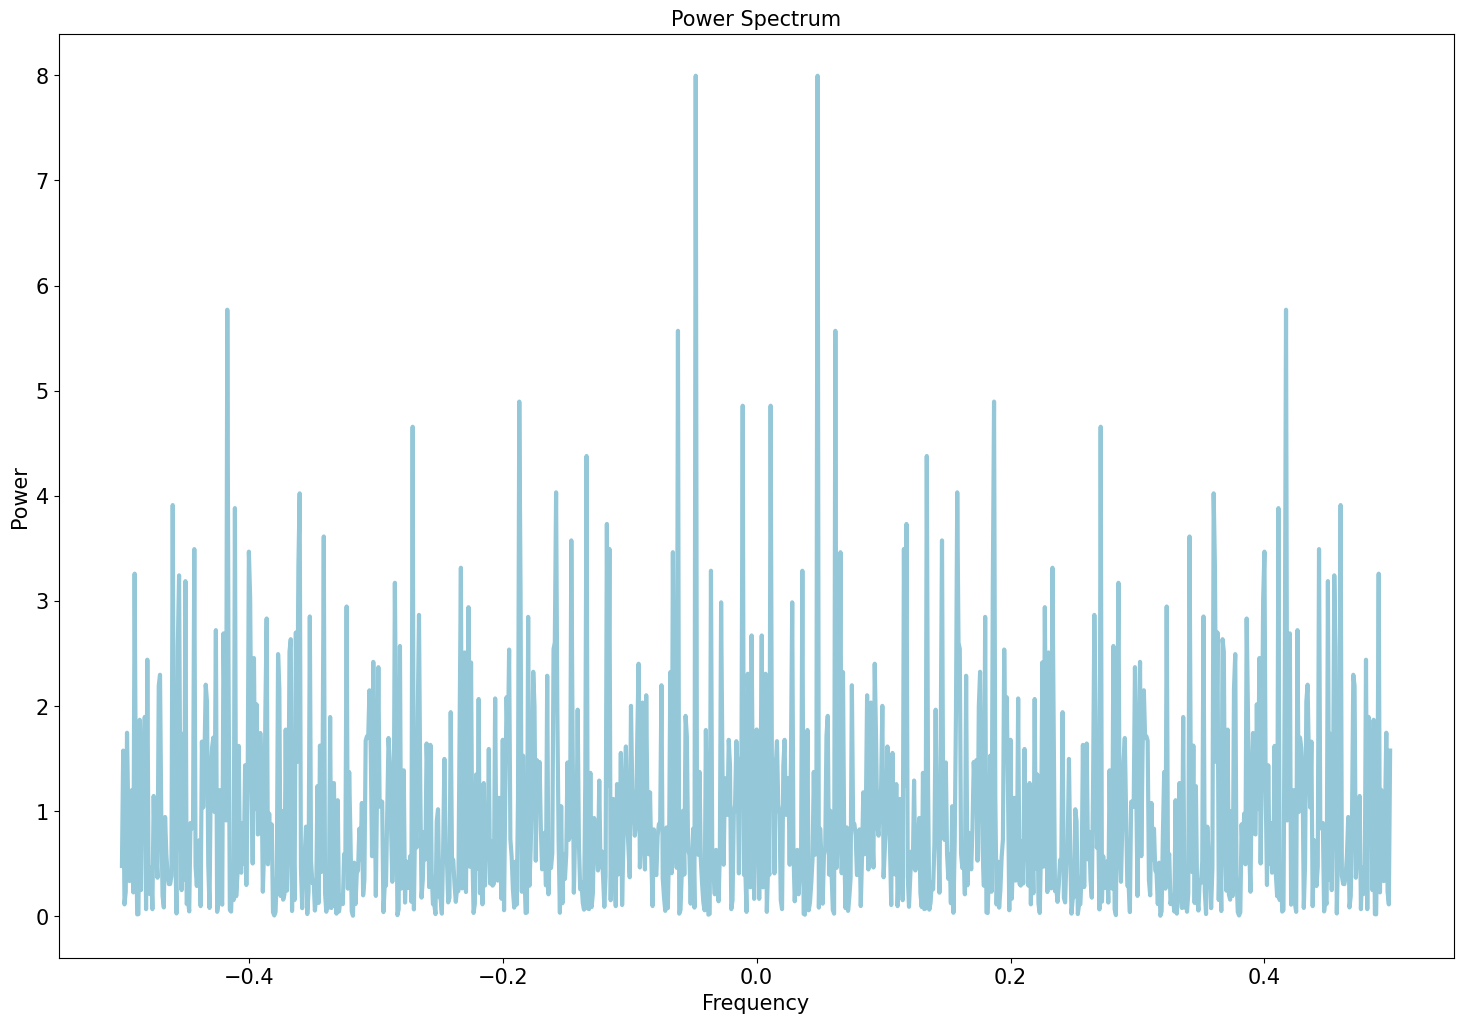

In [23]:
data = np.random.randn(1000)  # Replace with your own signal data

# Compute power spectra using FFT
fft_data = np.fft.fft(data)
power_spectrum = np.abs(fft_data) ** 2


# Normalize power spectrum if desired
normalized_spectrum = power_spectrum / len(data)

# Compute corresponding frequencies
sampling_rate = 1  # Replace with your sampling rate if applicable
frequencies = np.fft.fftfreq(len(data), d=1)    1/(n*d)

idx = np.argsort(frequencies)

# Plot power spectrum
import matplotlib.pyplot as plt
plt.plot(frequencies[idx], normalized_spectrum[idx])
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Power Spectrum')

In [114]:
fs = 1000.0 # 1 kHz sampling frequency
F1 = 10 # First signal component at 10 Hz
F2 = 60 # Second signal component at 60 Hz
T = 10 # 10s signal length
N0 = -10 # Noise level (dB)

10000


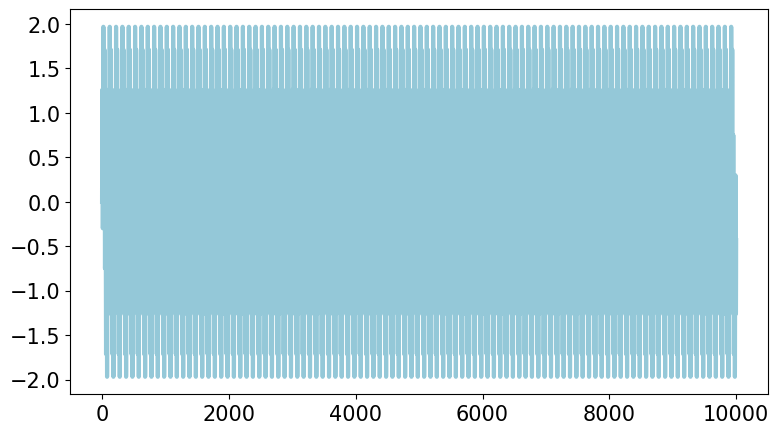

In [115]:
import numpy as np
t = np.r_[0:T:(1/fs)] # Sample times
# Two Sine signal components at frequencies F1 and F2.
signal = np.sin(2 * F1 * np.pi * t) + np.sin(2 * F2 * np.pi * t) 
# White noise with power N0
#signal += np.random.randn(len(signal)) * 10**(N0/20.0) 
print(len(t))
plt.plot(signal)

[0.000e+00 2.000e-01 4.000e-01 ... 9.996e+02 9.998e+02 1.000e+03]


Text(0, 0.5, 'PSD [V**2/Hz]')

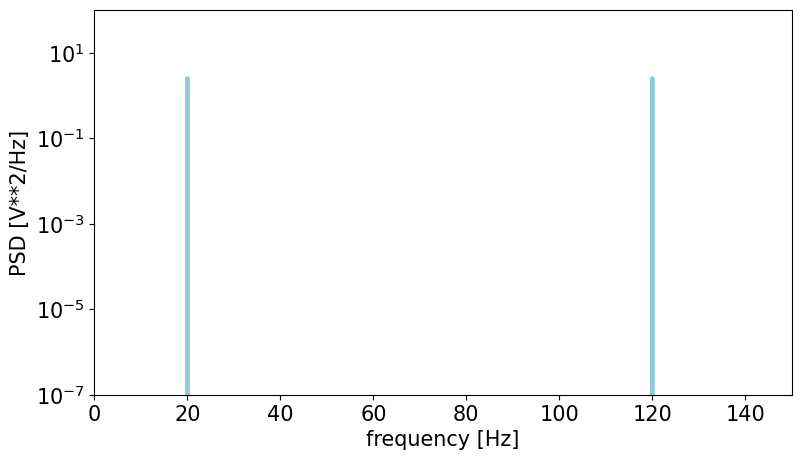

In [117]:
import scipy.signal

# f contains the frequency components
# S is the PSD
(f, S) = scipy.signal.periodogram(signal, 2000, scaling='density')

import matplotlib.pyplot as plt

print(f)

plt.semilogy(f, S)
plt.ylim([1e-7, 1e2])
plt.xlim([0,150])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')